In [1]:
#Exercici Q2
import numpy as np

MEDV_List = np.loadtxt("housing.data",usecols=(13,))
counter = 0
suma_MEDV = 0
suma_MSE = 0

for i in MEDV_List:
    counter += 1
    suma_MEDV += i

mitja = suma_MEDV / counter

for j in MEDV_List:
    suma_MSE += (j-mitja)**2
MSE = suma_MSE/counter

print "MEDV: " + str(mitja)
print "MSE: " + str(MSE)

MEDV: 22.5328063241
MSE: 84.4195561562


CRIM
MSE Train =  518.514938751
MSE Test =  475.987564002
R2 Train =  -6.48722746916
R2 Test =  -4.1024159723


ZN
MSE Train =  491.753459567
MSE Test =  362.075947061
R2 Train =  -6.10079832876
R2 Test =  -2.8813242933


INDUS
MSE Train =  327.188320567
MSE Test =  270.355811582
R2 Train =  -3.72451842417
R2 Test =  -1.89811733656


CHAS
MSE Train =  611.899365613
MSE Test =  457.913530962
R2 Train =  -7.83567549589
R2 Test =  -3.90866882039


NOX
MSE Train =  121.455237617
MSE Test =  140.398663786
R2 Train =  -0.753783591174
R2 Test =  -0.50502332155


RM
MSE Train =  38.331763967
MSE Test =  72.783635848
R2 Train =  0.446498809068
R2 Test =  0.219785527693


AGE
MSE Train =  212.85440046
MSE Test =  198.82205319
R2 Train =  -2.0735648965
R2 Test =  -1.13130110231


DIS
MSE Train =  151.662797788
MSE Test =  164.736674346
R2 Train =  -1.18997328868
R2 Test =  -0.765918065882


RAD
MSE Train =  131.254818692
MSE Test =  309.852464401
R2 Train =  -0.895287118119
R2 Test =  -2.32150728

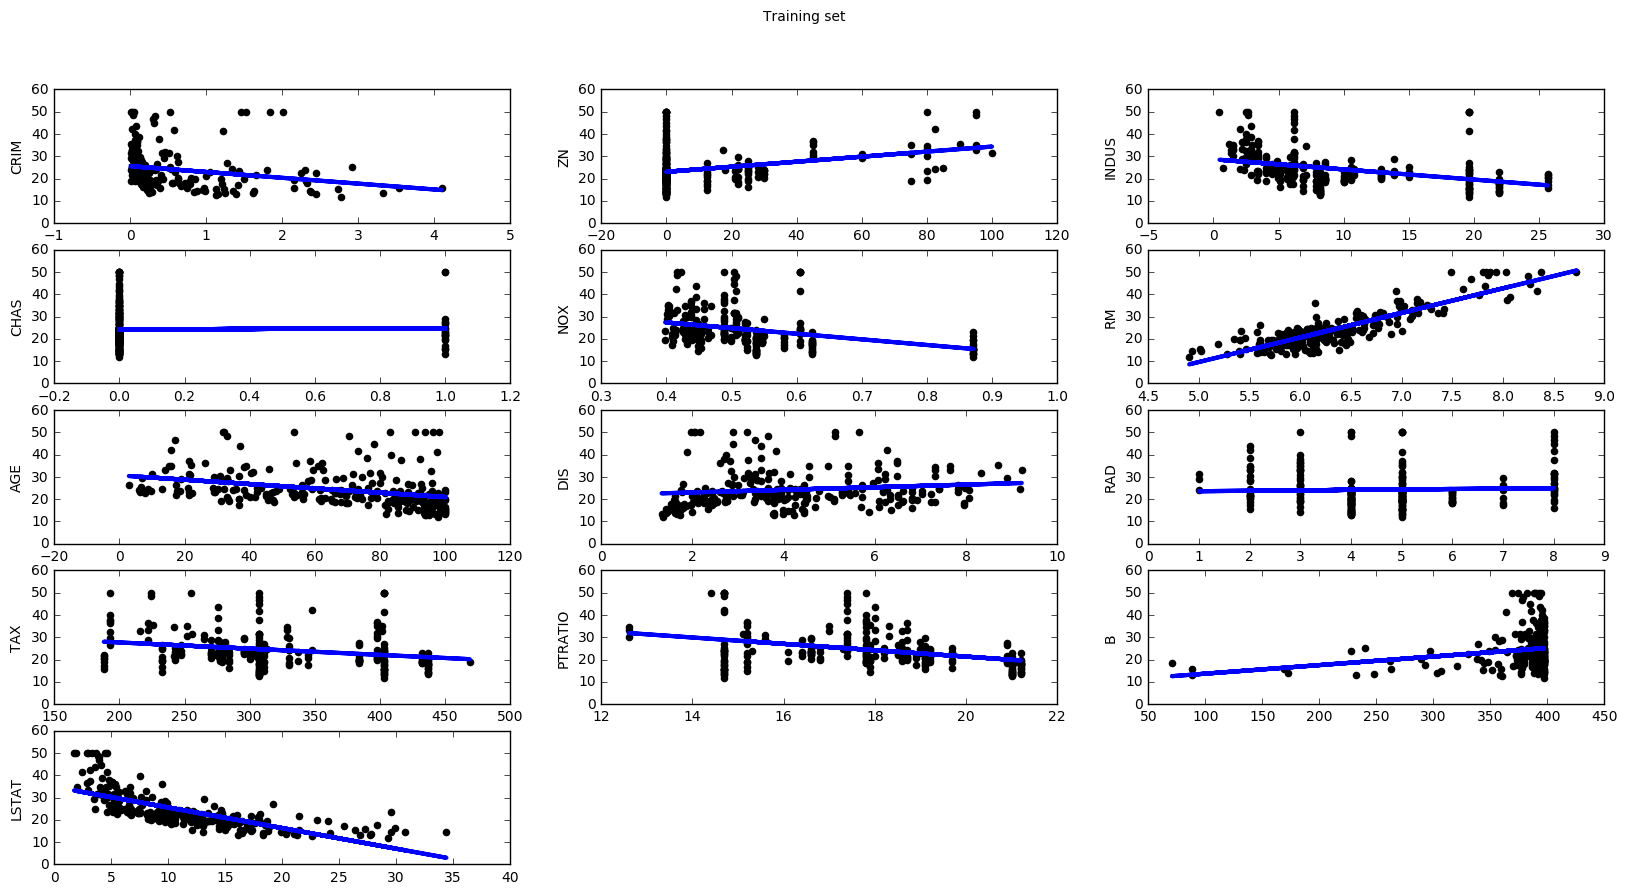

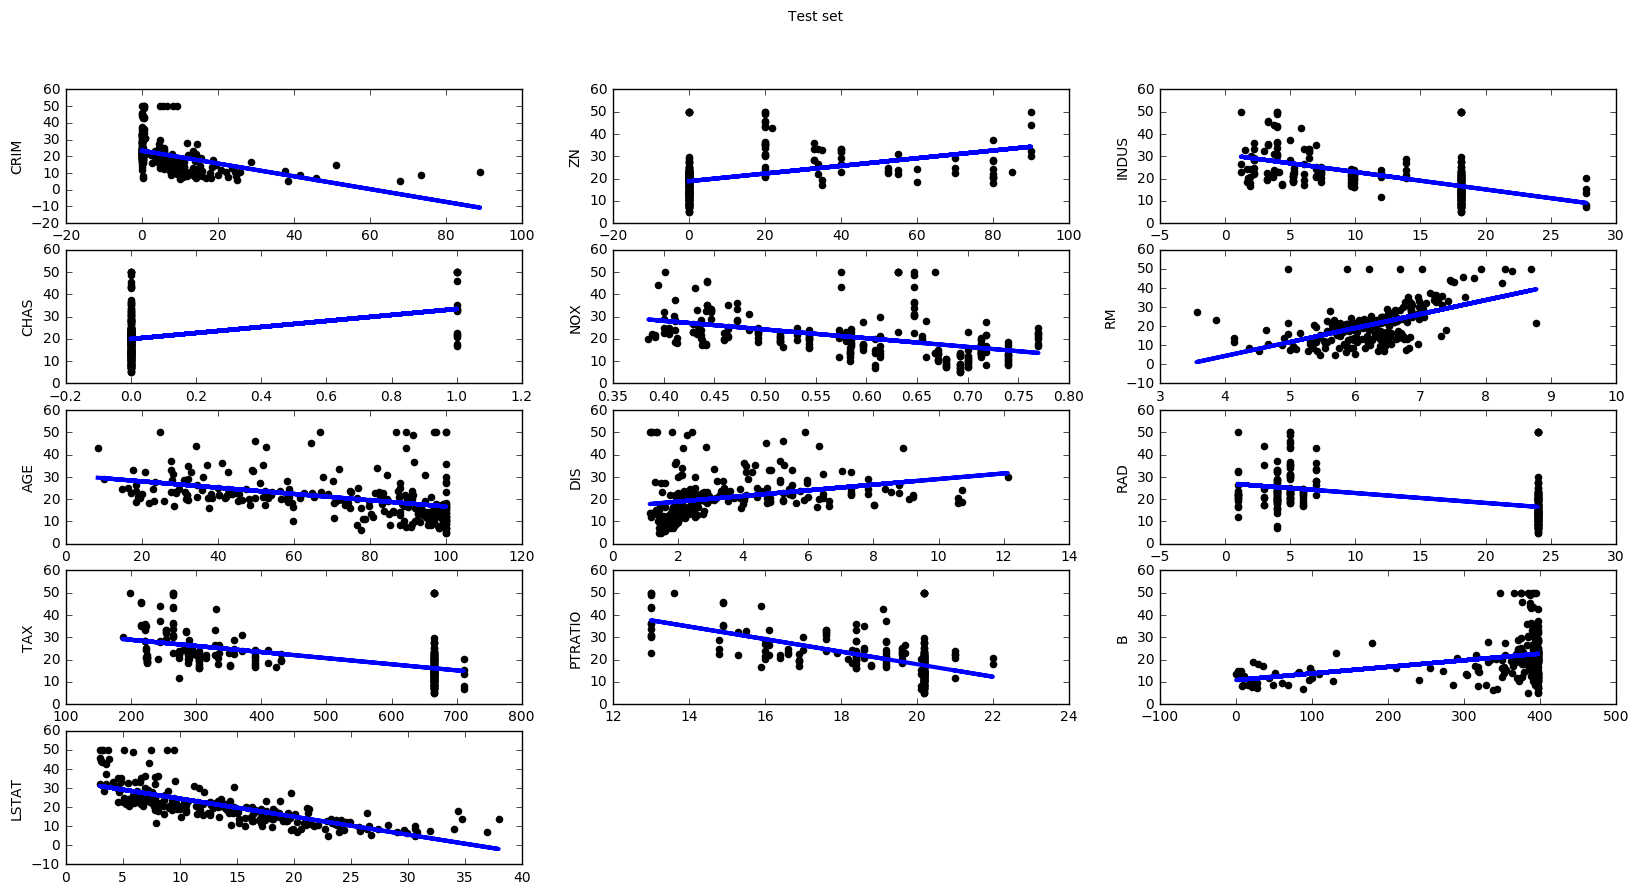

In [1]:
'''
Q3) Split the data in two parts (50%-50%) for training and testing 
(first half for training, second half for testing). Train a linear regressor model 
for each variable individually (plus a bias term) and compute the MSE on the training 
and the testing set. Which variable is the most informative? which one makes the model 
generalize better? and worse? Compute the coefficient of determination (R^2) for the test set.
'''
import matplotlib.pyplot as plt
import numpy as np

def theta(x,y):
    dot = np.dot
    inv = np.linalg.inv
    return dot(dot(inv(dot(x.T, x)), x.T), y)

def mse (x,y,theta):    
    dot = np.dot    
    return sum((y-dot(x, theta))**2) / len(y)

def varianza(data):
    sumVar = 0
    for j in range(0,data.size):
        sumVar += (np.mean(data)-data[j])**2
    return sumVar / data.size         

def covarianza(dataX, dataY):
    sumCov = 0
    for j in range(0,dataX.size):
        sumCov += (dataX[j]-np.mean(dataX))*(dataY[j]-np.mean(dataY))
    cov = sumCov / dataX.size    
    return cov

listAtrib = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']

dataX= np.loadtxt("housing.data",usecols=range(0,13))
dataY = np.loadtxt("housing.data",usecols=(13,))

fullSize = dataY.size
midSize = dataY.size/2

# Split the data into training/testing sets
dataX_train = dataX[0:midSize]
dataX_test = dataX[midSize:fullSize]

# Split the targets into training/testing sets
dataY_train = dataY[0:midSize]
dataY_test = dataY[midSize:fullSize]

var_y_train = varianza(dataY_train)
var_y_test = varianza(dataY_test)

for i in range(0, 13):        
    
    Xtrain = dataX_train[:,i:i+1]
    Xtest = dataX_test[:,i:i+1]        
    
    MSE_train = mse(Xtrain,dataY_train,theta(Xtrain,dataY_train))
    MSE_test =  mse(Xtest,dataY_test,theta(Xtest,dataY_test))    
    
    print listAtrib[i]
    print 'MSE Train = ', MSE_train
    print 'MSE Test = ', MSE_test    
    print 'R2 Train = ', 1-(MSE_train/var_y_train)
    print 'R2 Test = ', 1-(MSE_test/var_y_test)
    print '\n'
    
    #Equacio de la recta training
    a_train = covarianza(Xtrain, dataY_train)/varianza(Xtrain)
    b_train = np.mean(dataY_train)-a_train*np.mean(Xtrain)    
    predict_X_Train = a_train*Xtrain + b_train
    
    # Plot outputs
    plt.figure(1,figsize=(20,10))
    plt.suptitle("Training set")
    plt.subplot(5,3,i+1)
    plt.scatter(Xtrain, dataY_train,  color='black')
    plt.plot(Xtrain, predict_X_Train, color='blue',
             linewidth=3)
    plt.ylabel(listAtrib[i])
    
    #Equacio de la recta test
    a_test = covarianza(Xtest, dataY_test)/varianza(Xtest)
    b_test = np.mean(dataY_test)-a_test*np.mean(Xtest)    
    predict_X_Test = a_test*Xtest + b_test
    
    # Plot outputs
    plt.figure(2,figsize=(20,10))
    plt.suptitle("Test set")
    plt.subplot(5,3,i+1)
    plt.scatter(Xtest, dataY_test,  color='black')
    plt.plot(Xtest, predict_X_Test, color='blue',
             linewidth=3)
    plt.ylabel(listAtrib[i])
    
print "RM is the most informative variable, and can generalize better " 
print "the model because R2 has the best value for training as well as for test data."
print "The worst variables are CRIM and CHAS because have the higher MSE values for train and test."
    
plt.show()

In [2]:
'''
Q4) Now train a model with all the variables plus a bias term. What is the performance 
in the test set? Try removing the worst-performing variable you found in step 3, 
and run again the experiment. What happened?
'''
import numpy as np

def theta(x,y):
    dot = np.dot
    inv = np.linalg.inv
    return dot(dot(inv(dot(x.T, x)), x.T), y)

def mse (x,y,theta):    
    dot = np.dot    
    return sum((y-dot(x, theta))**2) / len(y)

def varianza(data):
    sumVar = 0
    for j in range(0,data.size):
        sumVar += (np.mean(data)-data[j])**2
    return sumVar / data.size    

dataX = np.loadtxt("housing.data",usecols=range(0,13))
dataY = np.loadtxt("housing.data",usecols=(13,))

fullSizeY = dataY.size
midSizeY=dataY.size/2

# Split the data into training/testing sets
dataX_train = dataX[0:midSizeY]
dataX_test = dataX[midSizeY:fullSizeY]

     
# Split the targets into training/testing sets
dataY_train = dataY[0:midSizeY]
dataY_test = dataY[midSizeY:fullSizeY]
 
var_y_train = varianza(dataY_train)
var_y_test = varianza(dataY_test)
 
MSE_train = mse(dataX_train,dataY_train,theta(dataX_train,dataY_train))
MSE_test =  mse(dataX_test,dataY_test,theta(dataX_test,dataY_test))
 
print 'Performance with all data'
print 'MSE Train = ', MSE_train
print 'MSE Test = ', MSE_test    
print 'R2 Train = ', 1-(MSE_train/var_y_train)
print 'R2 Test = ', 1-(MSE_test/var_y_test)
print '\n'

#Exclude worst variables
X_IN_columns = [1,2,4,5,6,7,8,9,10,11,12]
dataX_train = dataX_train[:,X_IN_columns]
dataX_test = dataX_test[:,X_IN_columns]

MSE_train = mse(dataX_train,dataY_train,theta(dataX_train,dataY_train))
MSE_test =  mse(dataX_test,dataY_test,theta(dataX_test,dataY_test))
  
print 'Performance with excluded data'
print 'MSE Train = ', MSE_train
print 'MSE Test = ', MSE_test    
print 'R2 Train = ', 1-(MSE_train/var_y_train)
print 'R2 Test = ', 1-(MSE_test/var_y_test)
print '\n'

print "The performance has not experimented any big change after to"
print "exclude the worst variables."

Performance with all data
MSE Train =  10.1132599756
MSE Test =  32.558724904
R2 Train =  0.853967027306
R2 Test =  0.650982146274


Performance with excluded data
MSE Train =  10.3851178909
MSE Test =  34.7536484355
R2 Train =  0.850041466249
R2 Test =  0.62745335323


The performance has not experimented any big change after to
exclude the worst variables.


In [1]:
'''
Q5) We can give more capacity to a linear regression model by using basis functions (Bishop, sec. 3.1). 
In short, we can apply non-linear transformations to the input variables to extend the feature vector. 
Here we will try a polynomial function:
     Polynomial basis expansion
Repeat step 3 but adding, one by one, all polynomials up to degree 4. 
What are the effects of adding more capacity to the model?
'''

import numpy as np

def theta(x,y):
    dot = np.dot
    inv = np.linalg.inv
    return dot(dot(inv(dot(x.T, x)), x.T), y)

def mse (x,y,theta):    
    dot = np.dot    
    return sum((y-dot(x, theta))**2) / len(y)

def varianza(data):
    sumVar = 0
    for j in range(0,data.size):
        sumVar += (np.mean(data)-data[j])**2
    return sumVar / data.size         

def covarianza(dataX, dataY):
    sumCov = 0
    for j in range(0,dataX.size):
        sumCov += (dataX[j]-np.mean(dataX))*(dataY[j]-np.mean(dataY))
    cov = sumCov / dataX.size    
    return cov

listAtrib = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']

dataX= np.loadtxt("housing.data",usecols=range(0,13))
dataY = np.loadtxt("housing.data",usecols=(13,))

fullSize = dataY.size
midSize = dataY.size/2

# Split the data into training/testing sets
dataX_train = dataX[0:midSize]
dataX_test = dataX[midSize:fullSize]

# Split the targets into training/testing sets
dataY_train = dataY[0:midSize]
dataY_test = dataY[midSize:fullSize]

var_y_train = varianza(dataY_train)
var_y_test = varianza(dataY_test)

grade = 4



for i in range(0, 13):
    if(i<>3):   #excloem la variable binaria CHAS que no ens aporta cap informacio
        print listAtrib[i]
        for j in range(1,grade+1):
            Xtrain = dataX_train[:,i:i+1]**j         
            Xtest = dataX_test[:,i:i+1]**j
            
            if(j==1):
                poli_X_train = Xtrain
                poli_X_test = Xtest
                
            if(j>>1):
                poli_X_train=np.hstack((poli_X_train,Xtrain))
                poli_X_test=np.hstack((poli_X_test,Xtest))
        
            MSE_train = mse(poli_X_train,dataY_train,theta(poli_X_train,dataY_train))
            MSE_test =  mse(poli_X_test,dataY_test,theta(poli_X_test,dataY_test))
            
            print 'Grade: ',j
            print 'MSE Train = ', MSE_train
            print 'MSE Test = ', MSE_test
            print 'R2 Train = ', 1-(MSE_train/var_y_train)
            print 'R2 Test = ', 1-(MSE_test/var_y_test)
        print '\n'

print 'As we can see, when we expand the variables to different grades, the bigger the grade,'
print 'the lower the value of MSE and R2 goes loooking for 1. That is the case of RM that from' 
print 'R2 Train=0.44 with gade 1, grows up to 0.80 in grade 4.'

CRIM
Grade:  1
MSE Train =  518.514938751
MSE Test =  475.987564002
R2 Train =  -6.48722746916
R2 Test =  -4.1024159723
Grade:  2
MSE Train =  411.586641025
MSE Test =  430.68989593
R2 Train =  -4.943209297
R2 Test =  -3.61684121666
Grade:  3
MSE Train =  334.083942364
MSE Test =  400.625277069
R2 Train =  -3.82408949739
R2 Test =  -3.2945592852
Grade:  4
MSE Train =  272.336746169
MSE Test =  378.634750429
R2 Train =  -2.93247525652
R2 Test =  -3.05882872656


ZN
Grade:  1
MSE Train =  491.753459567
MSE Test =  362.075947061
R2 Train =  -6.10079832876
R2 Test =  -2.8813242933
Grade:  2
MSE Train =  465.802997803
MSE Test =  313.828566251
R2 Train =  -5.72608007933
R2 Test =  -2.36412967503
Grade:  3
MSE Train =  461.251099854
MSE Test =  287.713172476
R2 Train =  -5.66035179879
R2 Test =  -2.08418202009
Grade:  4
MSE Train =  461.040049926
MSE Test =  286.505237474
R2 Train =  -5.65730429002
R2 Test =  -2.0712333901


INDUS
Grade:  1
MSE Train =  327.188320567
MSE Test =  270.35581158